# Simple Neural Network Training Example

## Sine Curve Approximation

Epoch [100/500], Loss: 0.0009
Epoch [200/500], Loss: 0.0003
Epoch [300/500], Loss: 0.0002
Epoch [400/500], Loss: 0.0005
Epoch [500/500], Loss: 0.0001


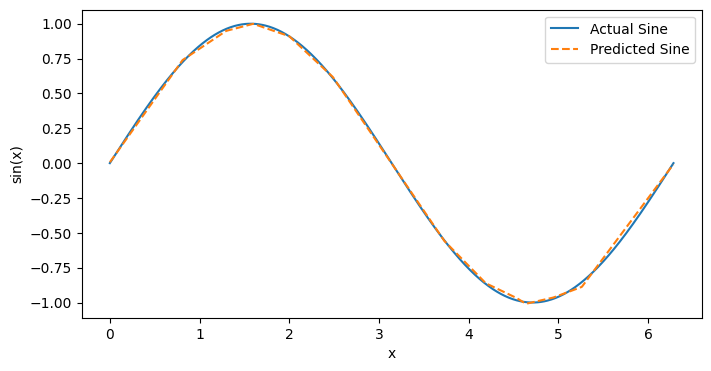

In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Generate dataset for sine curve approximation
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Convert numpy arrays to torch tensors and add a feature dimension
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Create a TensorDataset and DataLoader for batch processing
dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a simple neural network model
class SineModel(nn.Module):
    def __init__(self):
        super(SineModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.net(x)

model = SineModel()

# Set up the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Generate predictions after training
with torch.no_grad():
    predicted = model(x_tensor).detach().numpy()

# Plot the actual sine curve and the network's predictions
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Actual Sine')
plt.plot(x, predicted, label='Predicted Sine', linestyle='--')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.savefig("sine_approximation.png")
plt.show()
